## Summary of the article "Big Self-Supervised Models are Strong Semi-Supervised Learners", Brain Team from Google Research

In [3]:
from IPython.display import display, Image

Chen, Ting, Simon Kornblith, Kevin Swersky, Mohammad Norouzi and Geoffrey E. Hinton. “Big Self-Supervised Models are Strong Semi-Supervised Learners.” ArXiv abs/2006.10029 (2020): n. pag.

https://doi.org/10.48550/arXiv.2006.10029

<p style='font-size: 16px; line-height: 1.5;'>Summarized by: Militsa Ivanova, SoftUni username: militsa082000

<p style='font-size: 16px; line-height: 1.5;'>The paper, "Big Self-Supervised Models are Strong Semi-Supervised Learners," delves into the efficacy of large self-supervised learning models in semi-supervised settings. It highlights how large neural networks pre-trained without labels can significantly enhance performance when fine-tuned on a small labeled dataset. A key aspect of their approach is the use of larger and deeper projection heads, which aid in better representation learning. They introduce a distillation technique using unlabeled data to improve model accuracy and facilitate knowledge transfer to smaller networks. The study finds that larger models show greater advantages with fewer labeled examples and their method surpasses traditional fully supervised learning methods in effectiveness.</p>

<p style='font-size: 16px; line-height: 1.5;'> The results from the paper may be able to solve the long-standing problem in machine learning with the lack of labeled data in big datasets. This approach has become predominant in NLP but has received little attention in computer vision. They are using the dataset ImageNet to do their research on. When using the approach "unsupervised pretrain, supervised fine-tune" they found out that network size is important: using a big (deep and wide) NN for self-supervised pretraining and fine-tuning greatly improves accuracy. 
</p>
<p style='font-size: 16px; line-height: 1.5;'> Once a CNN is pretrained and fine-tuned, its task-specific predictions can be further improved and distilled into a smaller network. They made use of unlabeled data for a second time, encouraging the student network to mimic the teacher network's prediction.</p>
<p style='font-size: 16px; line-height: 1.5;'> There are 3 steps:
<br>1. Unsupervised or self-supervised pretraining
<br>2. Supervised fine-tuning
<br>3. Distillation using unlabeled data</p>

<p style='font-size: 16px; line-height: 1.5;'> Further, they also demonstrate the importance of the nonlinear transformation (a.k.a projection head) after convolutional layers used in SimCLR for semi-supervised learning. A deeper projection head improves the representation quality measured by linear evaluation and also semi-supervised performance when fine-tuning from a <b>middle</b> layer of the projection head.</p>

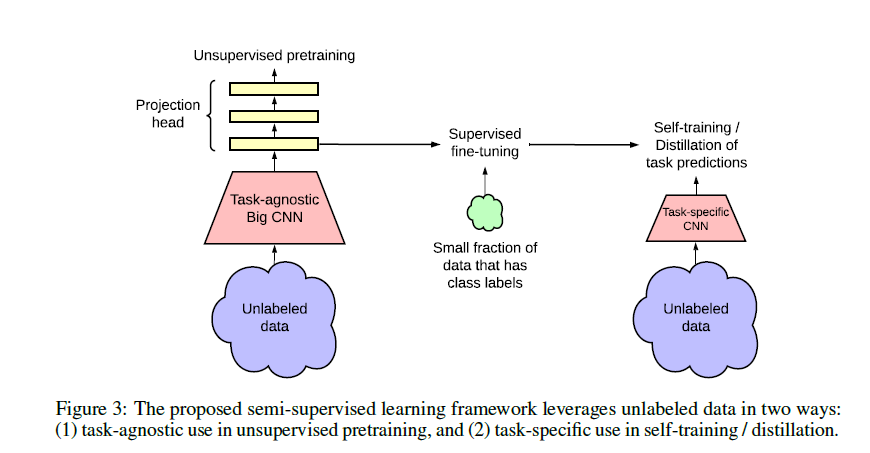

In [8]:
display(Image(filename='fig.1 theory.png'))

#### Self-supervised pretraining with SimCLRv2

<p style='font-size: 16px; line-height: 1.5;'>They adopt and improve SimCLR - an approach based on contrastive learning.</p>
<p style='font-size: 16px; line-height: 1.5;'> The contrastive loss between a pair of positive examples i, j (augmented from the same image) is given as follows: </p>

$$\text{NT-Xent}_{i,j} = -\log \frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N} \mathbb{1}_{[k \neq i]} \exp(\text{sim}(z_i, z_k)/\tau)}$$


<p style='font-size: 16px; line-height: 1.5;'> Where sim(..) is cosine similarity between two vectors and $\tau$ is a temperature scalar (a value that is used to control the "softness" or "smoothness" of a probability distribution).
    

<p style='font-size: 16px; line-height: 1.5;'>$\exp(\text{sim}(z_i, z_k)/\tau)$ - This is the exponential of the cosine similarity between the embedding vectors zi and zj, scaled by the temperature parameter $\tau$. Cosine similarity measures how similar two vectors are in terms of their angle, regardless of their magnitude.

 <p style='font-size: 16px; line-height: 1.5;'>$\sum_{k=1}^{2N} \mathbb{1}_{[k \neq i]} \exp(\text{sim}(z_i, z_k)/\tau)$ -This is the denominator of a softmax function over all 2N examples in a batch (where N is the number of images, and 2 represents a pair of augmented examples from each image). The indicator function 1 [k=/1]
ensures that the embedding zi is not compared with itself. It sums the exponential of the cosine similarities of zi with all other embedding zk in the batch, excluding itself.

<p style='font-size: 16px; line-height: 1.5;'>The temperature $\tau$ serves to scale the distribution of similarities, controlling the separation of the data in the embedding space. A smaller τ results in a distribution where fewer items contribute significantly to the sum in the denominator, thus emphasizing harder negatives.

<p style='font-size: 16px; line-height: 1.5;'>In essence, the loss encourages the model to learn embeddings such that positive pairs (augmented versions of the same image) have high cosine similarity, while negative pairs (augmented versions of different images) have low cosine similarity.

<p style='font-size: 16px; line-height: 1.5;'>To minimize this loss, the model must produce embeddings that bring positive pairs closer together while pushing negative pairs apart in the embedding space. This loss is termed "contrastive" because it is based on contrasting positive pairs against negative pairs. The acronym "NT-Xent" stands for normalized temperature-scaled cross entropy loss, which combines the concepts of normalization (through softmax), temperature scaling, and cross-entropy in a contrastive learning framework.

<p style='font-size: 16px; line-height: 1.5;'> They have improved SimCLR by:
    <br>- training on models that are deeper (more layers) but less wide (fewer neurons or units in each layer)
    <br>- increasing the capacity of the non-linear network (the projection head) by making it deeper and fine-tuning it from a middle layer
    <br>- incorporating the memory mechanism from MoCo, which designates a memory network
 </p>

#### Fine-tuning 

<p style='font-size: 16px; line-height: 1.5;'> Instead of throwing the projection head after pretraining as in SimCLR, they have proposed to incorporate part of the MLP projection head into the base encoder, which is responsible for transforming the input data into a fixed-dimensional representation that captures relevant information, during the fine-tuning. <p>
    

#### Self-training/ distillation

<p style='font-size: 16px; line-height: 1.5;'> They have used the fine-tuned network as a teacher to impute labels for training a student network. The distillation loss that needs to be minimized in this case is the following:

$$\mathcal{L}_{\text{distill}} = -\sum_{x_i \in \mathcal{D}} \left[ \sum_{y} P^T(y|x_i; \tau) \log P^S(y|x_i; \tau) \right],
$$

<p style='font-size: 16px; line-height: 1.5;'>Where the teacher network produces Pt and is <b>fixed</b> during the distillation, while the student network produces Ps and this is the part that is being trained. </p>

<p style='font-size: 16px; line-height: 1.5;'>$-\sum_{x_i \in \mathcal{D}}$ This is a summation over all samples x in the dataset D. It aggregates the distillation loss across the entire dataset. 

<p style='font-size: 16px; line-height: 1.5;'>$ \sum_{y}$ This inner summation runs over all possible output classes y.

<p style='font-size: 16px; line-height: 1.5;'>$ P^T(y|x_i; \tau)$ This is the probability distribution over classes produced by the teacher model for a given input xi, potentially softened by a temperature parameter $\tau$. A higher temperature makes the probability distribution softer (more smoothed out), which can provide more information about the relationships between different classes as perceived by the teacher model.

<p style='font-size: 16px; line-height: 1.5;'> $\log P^S(y|x_i; \tau)$ This is a natural logarithm of the probability distribution over classes produced by the student model for the same input xi, also potentially softened by the same temperature scalar $\tau$.

<p style='font-size: 16px; line-height: 1.5;'> In the study, they concentrate on employing distillation solely with unlabeled data. However, when a considerable quantity of labeled data is available, it is feasible to merge the distillation loss with the true labels through a balanced integration of both.

$$\mathcal{L} = -(1 - \alpha) \sum_{(x_i, y_i) \in \mathcal{D}_L} \left[\log P^S(y_i|x_i)\right] - \alpha \sum_{x_i \in \mathcal{D}} \left[ \sum_{y} P^T(y|x_i; \tau) \log P^S(y|x_i; \tau) \right],
$$

<p style='font-size: 16px; line-height: 1.5;'>$\mathcal{L}$: Total combined loss

<p style='font-size: 16px; line-height: 1.5;'>$\alpha$: A weighting factor that balances the contribution of the two terms in the loss function. It takes a value between 0 and 1.

<p style='font-size: 16px; line-height: 1.5;'>The first summation goes over all samples xi, yi in the dataset D that are labeled (L stands for labeled).

<p style='font-size: 16px; line-height: 1.5;'>$\left[\log P^S(y_i|x_i)\right]$ The logarithm of the probability that the student model assigns to the true label yi given the input xi. This is the standard cross-entropy loss against the hard targets, encouraging the student model to predict the correct label.

<p style='font-size: 16px; line-height: 1.5;'>The second summation goes over all samples xi in the dataset D, which can include both labeled and unlabeled data.

<p style='font-size: 16px; line-height: 1.5;'>The rest of the formula is the same as the one above.

<p style='font-size: 16px; line-height: 1.5;'><b>The loss function has two parts:</b>

<p style='font-size: 16px; line-height: 1.5;'>The first part is the standard cross-entropy loss with the true labels, which is typically used for training neural networks. This part focuses on learning directly from the ground truth labels.

<p style='font-size: 16px; line-height: 1.5;'>The second part is the distillation loss, which encourages the student model to produce similar outputs to the teacher model. This part uses the softened outputs of both the teacher and student models, making the student model learn the structure captured by the teacher's predictions.

<p style='font-size: 16px; line-height: 1.5;'>The total loss L is a weighted sum of these two parts, controlled by the hyperparameter α. The temperature parameter τ is used to control the softness of the probabilities, allowing the distillation process to capture more information from the teacher model than just the hard labels.

<p style='font-size: 16px; line-height: 1.5;'>In essence, this loss function enables the student model to benefit from both the ground truth labeled data and the knowledge distilled from the teacher model, which can be especially useful when labeled data is limited.

### Results

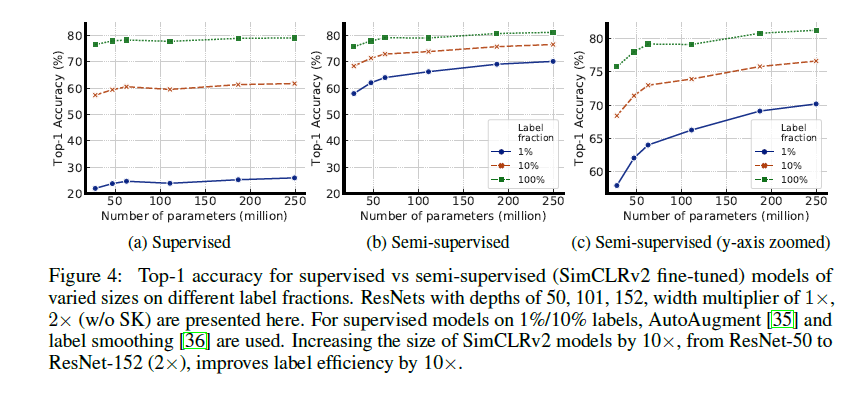

In [13]:
display(Image(filename='fig. 4 theory.png'))

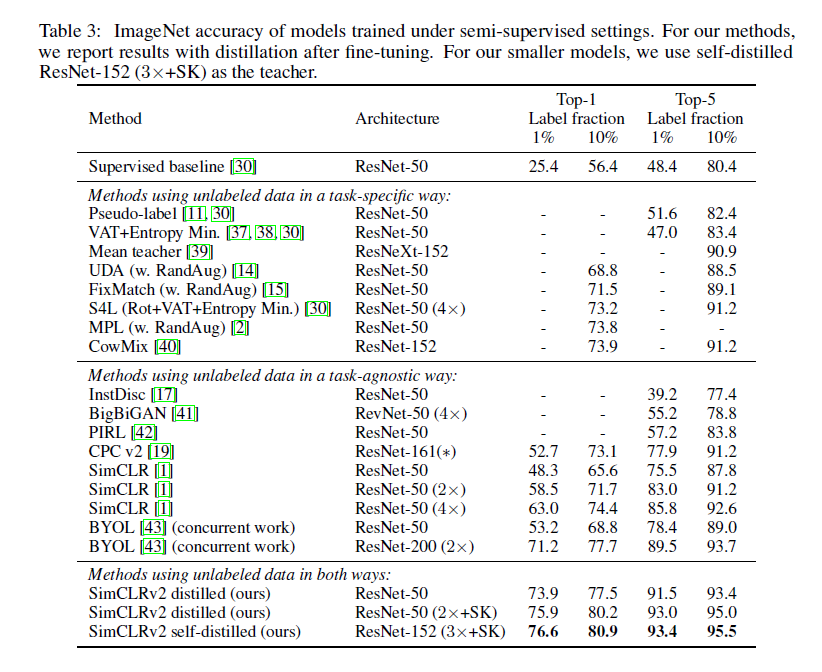

In [15]:
display(Image(filename='fig. 5 theory.png'))

## Conclusion

<p style='font-size: 16px; line-height: 1.5;'>The paper concludes that their findings in semi-supervised learning using large, self-supervised models have broad implications for computer vision applications, especially where labeling data is costly or difficult. This approach is particularly beneficial in fields like medicine, where accurate labeling is crucial yet resource-intensive, and in agriculture, where it can enhance food production. However, the authors also acknowledge potential negative impacts, such as the use of their methods in invasive surveillance systems and the economic effects on the human labeling industry. The research thus presents a nuanced view of the technology's wide-ranging applications and consequences. <p>

## Pseudo code

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import LayerNormalization, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Define the ResNet model with a projection head for SimCLRv2
def create_resnet_simclr(version='resnet50'):
    base_model = ResNet50V2(include_top=False, weights=None, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(128)(x)  # Projection head to 128 dimensions
    model = tf.keras.Model(base_model.input, outputs)
    return model

In [5]:
# Define data augmentation for contrastive learning
def augment_images(image_batch):
    augmented_images = tf.image.random_flip_left_right(image_batch)
    augmented_images = tf.image.random_crop(augmented_images, size=(224, 224, 3))
    return augmented_images

In [6]:
# Define the contrastive loss function for SimCLRv2
def contrastive_loss(z_i, z_j, temperature):
    # Example calculation for two vectors, extend for batch
    numerator = tf.exp(tf.reduce_sum(z_i * z_j, axis=-1) / temperature)
    denominator = tf.reduce_sum(tf.exp(tf.reduce_sum(z_i * z_i, axis=-1) / temperature))
    loss = -tf.math.log(numerator / denominator)
    return loss

In [7]:
# Define the function for supervised fine-tuning
def fine_tune_model(model, labeled_dataset):
    model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(labeled_dataset, epochs=10)
    return model

In [8]:
# Define the function for distillation using unlabeled data
def distill_knowledge(teacher_model, student_model, unlabeled_dataset):
    # Generate pseudo-labels
    pseudo_labels = teacher_model.predict(unlabeled_dataset)
    student_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    student_model.fit(unlabeled_dataset, pseudo_labels, epochs=10)
    return student_model

In [ ]:
# Simulate the semi-supervised learning process
if __name__ == "__main__":
    
    # Step 1: Self-supervised Pretraining
    resnet_simclr = create_resnet_simclr()
    # Assume unlabeled_dataset is a tf.data.Dataset object with raw images
    # Apply augmentations and train the ResNet model using SimCLRv2 with contrastive loss
    
    # Step 2: Supervised Fine-tuning
    # Assume labeled_dataset is a tf.data.Dataset object with labeled images
    fine_tuned_model = fine_tune_model(resnet_simclr, labeled_dataset)
    
    # Step 3: Distillation with Unlabeled Data
    # Assume unlabeled_dataset is available for distillation process
    student_model = create_resnet_simclr()  # A new instance, possibly a smaller model
    distilled_model = distill_knowledge(fine_tuned_model, student_model, unlabeled_dataset)
    
    # The student model is now trained and can be used for predictions